In [ ]:
!pip install tensorflow
!pip install keras
!pip install numpy
!pip install pandas
!pip install imutils
!pip install scikit-learn
!pip install matplotlib
!pip install seaborn
!pip install flask
!pip install flask-cors
import tensorflow
import keras
import numpy
import pandas
import imutils
import sklearn
import matplotlib.pyplot as plt
import os
import seaborn as sns
from flask import Flask
from flask_cors import CORS


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import backend as K
from tensorflow.keras.layers import Dense, Activation,Dropout,Conv2D, MaxPooling2D,BatchNormalization, Flatten,Input
from tensorflow.keras.optimizers import Adam, Adamax
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras import regularizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model, load_model, Sequential
from keras.callbacks import ModelCheckpoint
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
import os
import seaborn as sns
sns.set_style('darkgrid')
from sklearn.metrics import confusion_matrix, classification_report
from IPython.display import display, HTML

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import os
print(os.listdir("/content/drive/My Drive/LASTDANCELASTCHANCE"))


['ABSTRAK HALUAN JALUR + PENDAYUNG + TAKULUAK BAREMBAI', 'ABSTRAK TAKULUAK BAREMBAI+PENDAYUNG', 'BAMBU+TAKULUAK BAREMBAI TABUR', 'BUNGA JALUR + DAUN SEDINGIN', 'BUNGA PAKIS+PENDAYUNG', 'CALEMPONG', 'CALEMPONG+DAYUNG', 'CALEMPONG+TAKULUAK BAREMBAI', 'CARANO', 'BUJANG DARA KUANSING', 'DAYUNG', 'HALUAN JALUR + PENDAYUNG', 'HALUAN JALUR + TAKULUAK BAREMBAI', 'HALUAN JALUR + TUGU JALUR', 'HARIMAU', 'JALUR + TAKULUAK BAREMBAI', 'JALUR', 'JALUR + PONDIANG', 'KONJI BARAYAK', 'LANCANG KUNING', 'PENDAYUNG SILANG + TAKULUAK BAREMBAI', 'PERAHU BAGANDUANG + BUNGA', 'PERAHU BAGANDUANG + DAYUNG', 'PERAHU BAGANDUANG + PAYUNG', 'PERAHU BAGANDUANG + TAKULUAK BAREMBAI', 'PERAHU BAGANDUANG', 'PONDIANG', 'PULUIK KUCUANG', 'SILEK', 'TAKULUAK BAREMBAI', 'TUAI PADI', 'TUGU JALUR', 'URANG MENYENTAK', 'CAGAK JALUR BAPACU', 'JAMBAU']


In [ ]:
# LANGKAH 1: MOUNT GOOGLE DRIVE
from google.colab import drive
drive.mount('/content/drive')

# LANGKAH 2: CEK DIREKTORI DATASET
import os
import pandas as pd
import cv2
import matplotlib.pyplot as plt

# Pastikan path dataset sesuai dengan lokasi di Google Drive
dataset_path = "/content/drive/My Drive/LASTDANCELASTCHANCE/"

# Periksa apakah folder ada
if not os.path.exists(dataset_path):
    raise FileNotFoundError(f"Folder {dataset_path} tidak ditemukan! Periksa kembali path Anda.")

# LANGKAH 3: LOAD DATASET KE DATAFRAME
filepaths = []
labels = []

# Ambil daftar folder dalam dataset
classlist = os.listdir(dataset_path)

# Loop untuk membaca setiap folder (kelas)
for klass in classlist:
    classpath = os.path.join(dataset_path, klass)

    if os.path.isdir(classpath):  # Pastikan hanya folder yang diproses
        flist = os.listdir(classpath)

        for f in flist:
            fpath = os.path.join(classpath, f)
            filepaths.append(fpath)
            labels.append(klass)  # Nama folder sebagai label

# Buat DataFrame
df = pd.DataFrame({'filepaths': filepaths, 'labels': labels})

# Tampilkan beberapa data pertama
print(df.head())
print("\nJumlah gambar per kelas:")
print(df['labels'].value_counts())

# LANGKAH 4: TAMPILKAN CONTOH GAMBAR
# Pilih satu gambar untuk ditampilkan
sample_image = df['filepaths'][0]

# Baca gambar menggunakan OpenCV
image = cv2.imread(sample_image)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Konversi BGR ke RGB



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
                                           filepaths  \
0  /content/drive/My Drive/LASTDANCELASTCHANCE/AB...   
1  /content/drive/My Drive/LASTDANCELASTCHANCE/AB...   
2  /content/drive/My Drive/LASTDANCELASTCHANCE/AB...   
3  /content/drive/My Drive/LASTDANCELASTCHANCE/AB...   
4  /content/drive/My Drive/LASTDANCELASTCHANCE/AB...   

                                              labels  
0  ABSTRAK HALUAN JALUR + PENDAYUNG + TAKULUAK BA...  
1  ABSTRAK HALUAN JALUR + PENDAYUNG + TAKULUAK BA...  
2  ABSTRAK HALUAN JALUR + PENDAYUNG + TAKULUAK BA...  
3  ABSTRAK HALUAN JALUR + PENDAYUNG + TAKULUAK BA...  
4  ABSTRAK HALUAN JALUR + PENDAYUNG + TAKULUAK BA...  

Jumlah gambar per kelas:
labels
TAKULUAK BAREMBAI                                       400
PERAHU BAGANDUANG + DAYUNG                              160
PERAHU BAGANDUANG + TAKULUAK BAREMBAI              

In [ ]:
train_split=.8
test_split=.1
dummy_split=test_split/(1-train_split)
train_df, dummy_df=train_test_split(df, train_size=train_split, shuffle=True, random_state=123)
test_df, valid_df=train_test_split(dummy_df, train_size=dummy_split, shuffle=True, random_state=123)
print ('train_df length: ', len(train_df), '  test_df length: ', len(test_df), '  valid_df length: ', len(valid_df))

train_df length:  1736   test_df length:  217   valid_df length:  217


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
                                           filepaths  \
0  /content/drive/My Drive/LASTDANCELASTCHANCE/AB...   
1  /content/drive/My Drive/LASTDANCELASTCHANCE/AB...   
2  /content/drive/My Drive/LASTDANCELASTCHANCE/AB...   
3  /content/drive/My Drive/LASTDANCELASTCHANCE/AB...   
4  /content/drive/My Drive/LASTDANCELASTCHANCE/AB...   

                                              labels  
0  ABSTRAK HALUAN JALUR + PENDAYUNG + TAKULUAK BA...  
1  ABSTRAK HALUAN JALUR + PENDAYUNG + TAKULUAK BA...  
2  ABSTRAK HALUAN JALUR + PENDAYUNG + TAKULUAK BA...  
3  ABSTRAK HALUAN JALUR + PENDAYUNG + TAKULUAK BA...  
4  ABSTRAK HALUAN JALUR + PENDAYUNG + TAKULUAK BA...  

Jumlah gambar per kelas:
labels
TAKULUAK BAREMBAI                                       400
PERAHU BAGANDUANG + DAYUNG                              160
PERAHU BAGANDUANG + TAKULUAK BAREMBAI              

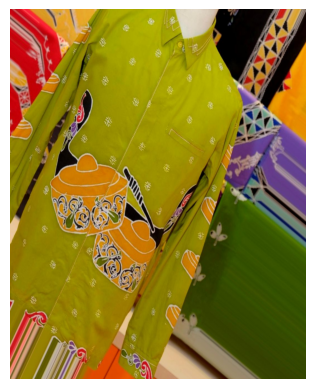

In [ ]:
# LANGKAH 1: IMPORT LIBRARY
from google.colab import drive
import os
import pandas as pd
import cv2
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split  # Pastikan train_test_split diimpor

# LANGKAH 2: MOUNT GOOGLE DRIVE
drive.mount('/content/drive')

# LANGKAH 3: CEK DIREKTORI DATASET
dataset_path = "/content/drive/My Drive/LASTDANCELASTCHANCE/"

if not os.path.exists(dataset_path):
    raise FileNotFoundError(f"Folder {dataset_path} tidak ditemukan! Periksa kembali path Anda.")

# LANGKAH 4: LOAD DATASET KE DATAFRAME
filepaths = []
labels = []

classlist = os.listdir(dataset_path)

for klass in classlist:
    classpath = os.path.join(dataset_path, klass)

    if os.path.isdir(classpath):
        flist = os.listdir(classpath)

        for f in flist:
            fpath = os.path.join(classpath, f)
            filepaths.append(fpath)
            labels.append(klass)

df = pd.DataFrame({'filepaths': filepaths, 'labels': labels})

print(df.head())
print("\nJumlah gambar per kelas:")
print(df['labels'].value_counts())

# LANGKAH 5: SPLIT DATA (Train, Test, Validation)
train_split = 0.8
test_split = 0.1
dummy_split = test_split / (1 - train_split)

# Pisahkan data training dari test+validasi
train_df, dummy_df = train_test_split(df, train_size=train_split, shuffle=True, random_state=123)

# Pisahkan test dan validasi dari dummy_df
test_df, valid_df = train_test_split(dummy_df, train_size=dummy_split, shuffle=True, random_state=123)

print(f'Train Data: {len(train_df)}')
print(f'Test Data: {len(test_df)}')
print(f'Validation Data: {len(valid_df)}')

# LANGKAH 6: TAMPILKAN CONTOH GAMBAR
sample_image = train_df['filepaths'].iloc[0]

image = cv2.imread(sample_image)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.imshow(image)
plt.axis('off')
plt.show()


In [ ]:
# LANGKAH 1: IMPORT LIBRARY
from google.colab import drive
import os
import pandas as pd
import cv2
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# LANGKAH 2: MOUNT GOOGLE DRIVE
drive.mount('/content/drive')

# LANGKAH 3: CEK DIREKTORI DATASET
dataset_path = "/content/drive/My Drive/LASTDANCELASTCHANCE/"

if not os.path.exists(dataset_path):
    raise FileNotFoundError(f"Folder {dataset_path} tidak ditemukan! Periksa kembali path Anda.")

# LANGKAH 4: LOAD DATASET KE DATAFRAME
filepaths = []
labels = []

classlist = os.listdir(dataset_path)

for klass in classlist:
    classpath = os.path.join(dataset_path, klass)

    if os.path.isdir(classpath):
        flist = os.listdir(classpath)

        for f in flist:
            fpath = os.path.join(classpath, f)
            filepaths.append(fpath)
            labels.append(klass)

df = pd.DataFrame({'filepaths': filepaths, 'labels': labels})

# SPLIT DATA (Train, Test, Validation)
train_split = 0.8
test_split = 0.1
dummy_split = test_split / (1 - train_split)

train_df, dummy_df = train_test_split(df, train_size=train_split, shuffle=True, random_state=123)
test_df, valid_df = train_test_split(dummy_df, train_size=dummy_split, shuffle=True, random_state=123)

print(f'Train Data: {len(train_df)}')
print(f'Test Data: {len(test_df)}')
print(f'Validation Data: {len(valid_df)}')

# IMAGE SETTINGS
height = 224
width = 224
channels = 3
batch_size = 64

img_shape = (height, width, channels)
img_size = (height, width)
length = len(test_df)

# Hitung test batch size optimal
test_batch_size = sorted(
    [int(length/n) for n in range(1, length+1) if length % n == 0 and length/n <= 80],
    reverse=True
)[0]
test_steps = int(length / test_batch_size)

print(f'Test batch size: {test_batch_size}, Test steps: {test_steps}')

# IMAGE DATA GENERATOR
gen = ImageDataGenerator(rescale=1./255)

train_gen = gen.flow_from_dataframe(
    train_df, x_col='filepaths', y_col='labels',
    target_size=img_size, class_mode='categorical',
    color_mode='rgb', shuffle=True, batch_size=batch_size
)

valid_gen = ImageDataGenerator(rescale=1./255).flow_from_dataframe(
    valid_df, x_col='filepaths', y_col='labels',
    target_size=img_size, class_mode='categorical',
    color_mode='rgb', shuffle=True, batch_size=batch_size
)

test_gen = ImageDataGenerator(rescale=1./255).flow_from_dataframe(
    test_df, x_col='filepaths', y_col='labels',
    target_size=img_size, class_mode='categorical',
    color_mode='rgb', shuffle=False, batch_size=test_batch_size
)

# TAMPILKAN KELAS YANG TERDETEKSI
classes = list(train_gen.class_indices.keys())
print("Kelas yang terdeteksi:", classes)
class_count = len(classes)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Train Data: 1736
Test Data: 217
Validation Data: 217
Test batch size: 31, Test steps: 7
Found 1736 validated image filenames belonging to 35 classes.
Found 217 validated image filenames belonging to 33 classes.
Found 217 validated image filenames belonging to 35 classes.
Kelas yang terdeteksi: ['ABSTRAK HALUAN JALUR + PENDAYUNG + TAKULUAK BAREMBAI', 'ABSTRAK TAKULUAK BAREMBAI+PENDAYUNG', 'BAMBU+TAKULUAK BAREMBAI TABUR', 'BUJANG DARA KUANSING', 'BUNGA JALUR + DAUN SEDINGIN', 'BUNGA PAKIS+PENDAYUNG', 'CAGAK JALUR BAPACU', 'CALEMPONG', 'CALEMPONG+DAYUNG', 'CALEMPONG+TAKULUAK BAREMBAI', 'CARANO', 'DAYUNG', 'HALUAN JALUR + PENDAYUNG', 'HALUAN JALUR + TAKULUAK BAREMBAI', 'HALUAN JALUR + TUGU JALUR', 'HARIMAU', 'JALUR', 'JALUR + PONDIANG', 'JALUR + TAKULUAK BAREMBAI', 'JAMBAU', 'KONJI BARAYAK', 'LANCANG KUNING', 'PENDAYUNG SILANG + TAKULUAK BAREMBAI', 'PERAHU BAGAND

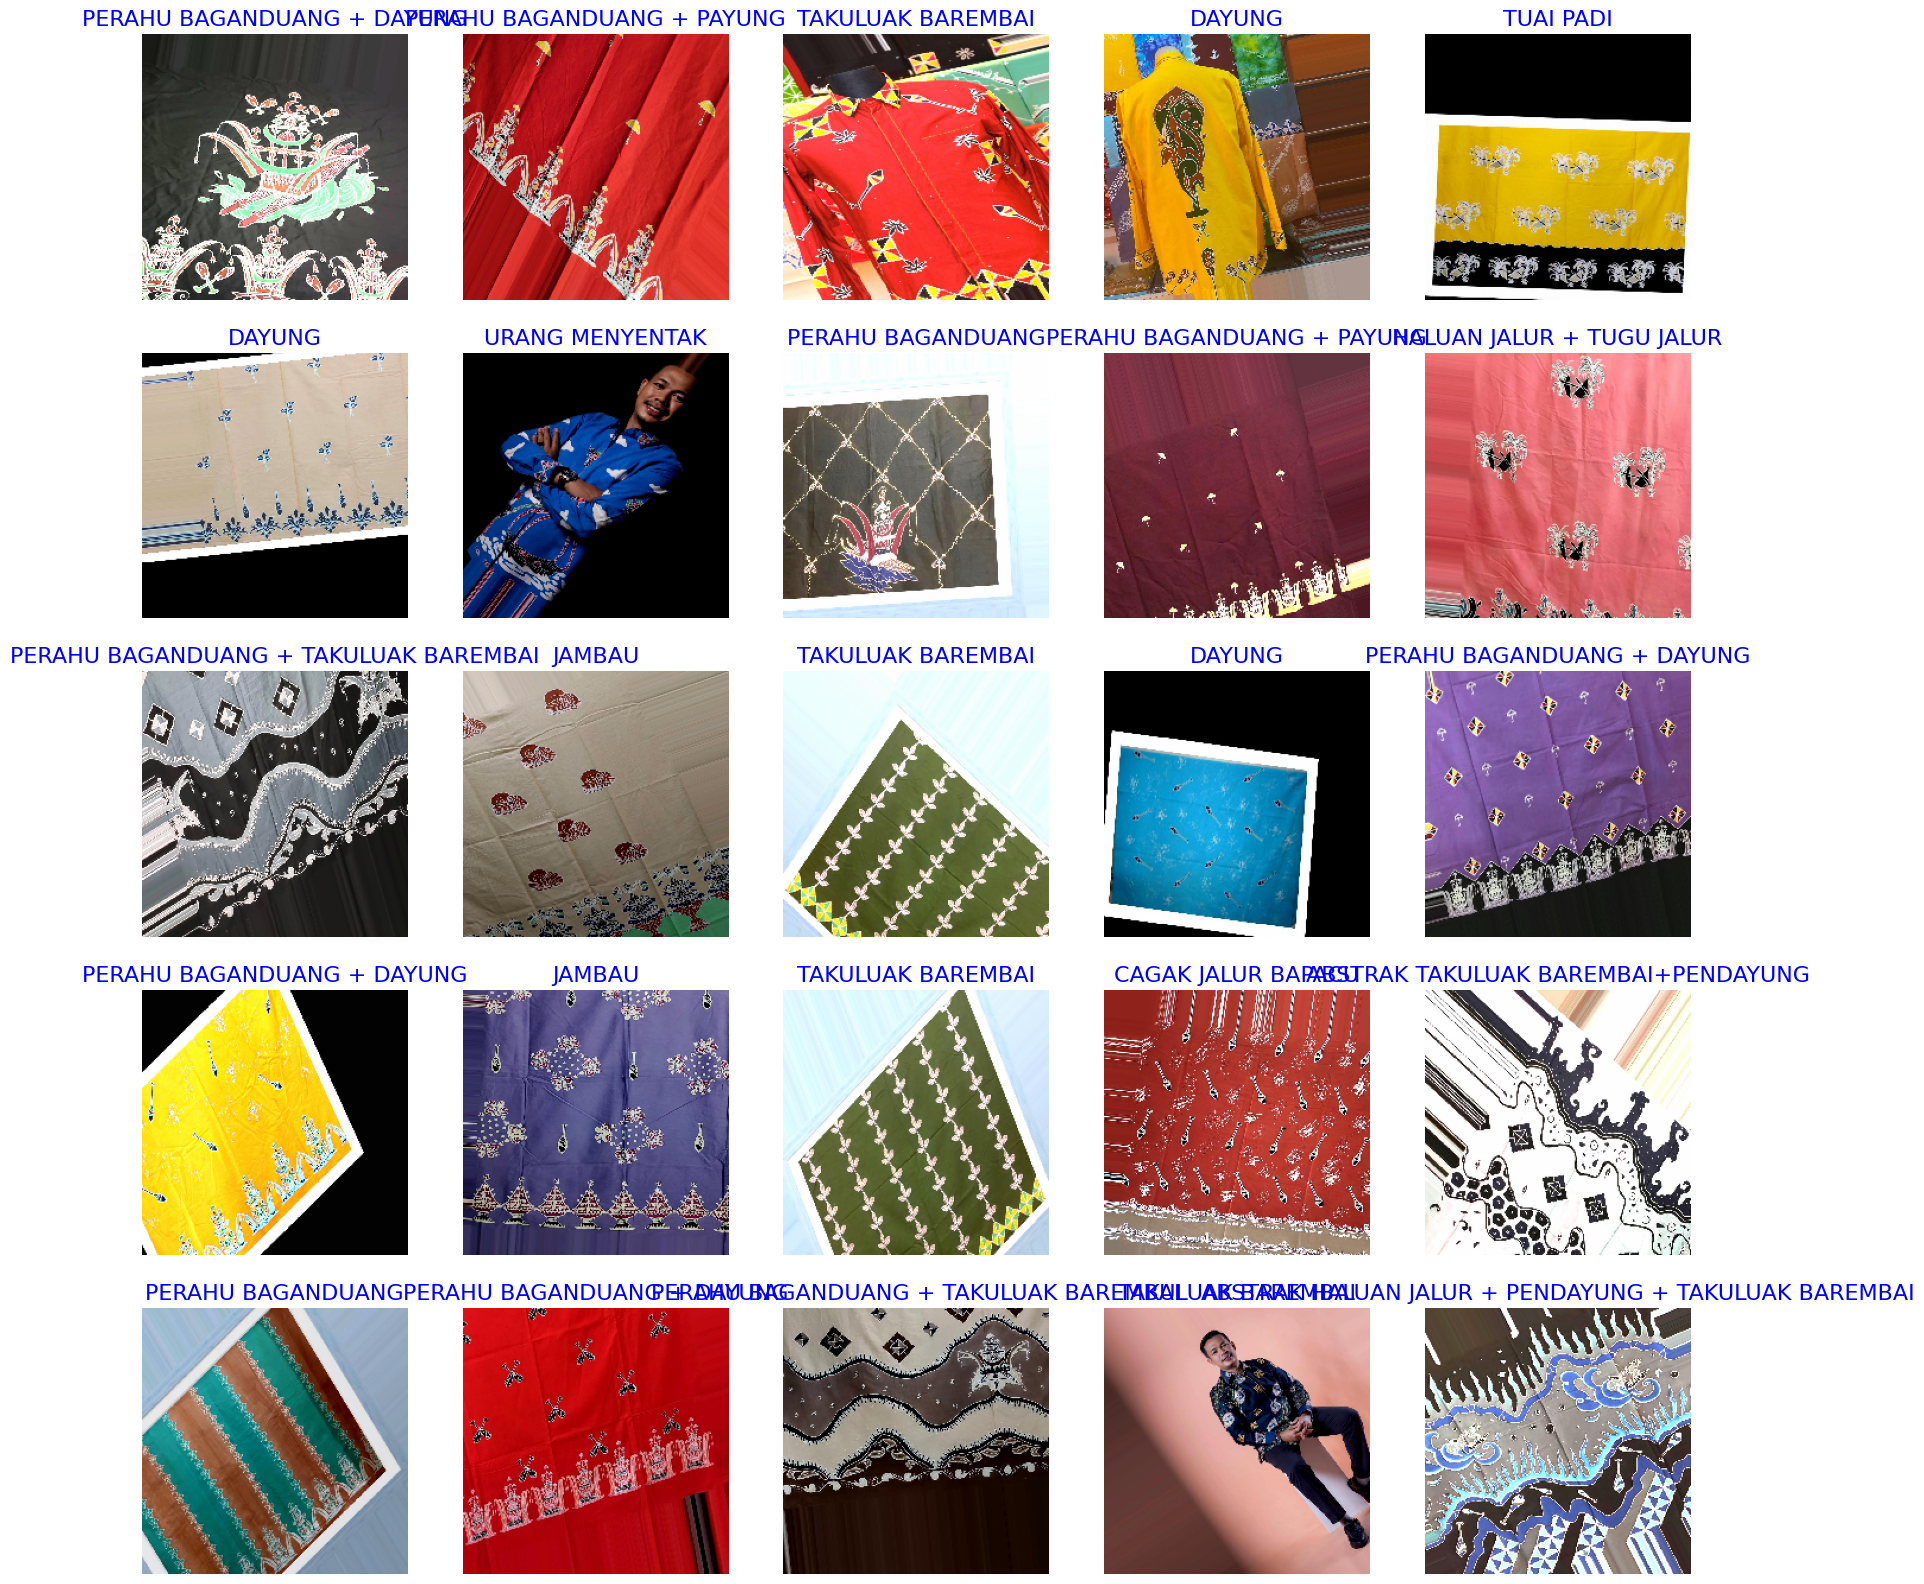

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def show_image_samples(gen):
    # Ambil kelas dari generator
    class_dict = gen.class_indices  # Mendapatkan mapping kelas
    classes = list(class_dict.keys())

    # Ambil satu batch gambar dan label
    images, labels = next(gen)

    plt.figure(figsize=(20, 20))
    num_images = min(len(labels), 25)  # Maksimum 25 gambar

    for i in range(num_images):
        plt.subplot(5, 5, i + 1)
        image = images[i]
        plt.imshow(image)

        # Cari index kelas berdasarkan argmax dari one-hot encoding
        index = np.argmax(labels[i])
        class_name = classes[index]

        plt.title(class_name, color='blue', fontsize=16)
        plt.axis('off')

    plt.show()

# Contoh penggunaan (gunakan generator yang sudah didefinisikan)
show_image_samples(train_gen)  # Bisa juga test_gen atau valid_gen


In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Input

# Pastikan TensorFlow sudah diimpor sebelum digunakan
base_model = tf.keras.applications.Xception(
    include_top=False,
    weights="imagenet",
    input_tensor=Input(shape=(224, 224, 3))
)


83683744/83683744 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [ ]:
base_model.summary()

Model: "xception"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv1        │ (None, 111, 111,  │        864 │ input_layer[0][0] │
│ (Conv2D)            │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv1_bn     │ (None, 111, 111,  │        128 │ block1_conv1[0][… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv1_act    │ (None, 111, 111,  │          0 │ block1_conv1_bn[… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv2        │ (None, 109, 109,  │     18,432 │ block1_conv1_act… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv2_bn     │ (None, 109, 109,  │        256 │ block1_conv2[0][… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv2_act    │ (None, 109, 109,  │          0 │ block1_conv2_bn[… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv1     │ (None, 109, 109,  │      8,768 │ block1_conv2_act… │
│ (SeparableConv2D)   │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv1_bn  │ (None, 109, 109,  │        512 │ block2_sepconv1[… │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv2_act │ (None, 109, 109,  │          0 │ block2_sepconv1_… │
│ (Activation)        │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv2     │ (None, 109, 109,  │     17,536 │ block2_sepconv2_… │
│ (SeparableConv2D)   │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv2_bn  │ (None, 109, 109,  │        512 │ block2_sepconv2[… │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 55, 55,    │      8,192 │ block1_conv2_act… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_pool         │ (None, 55, 55,    │          0 │ block2_sepconv2_… │
│ (MaxPooling2D)      │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 55, 55,    │        512 │ conv2d[0][0]      │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add (Add)           │ (None, 55, 55,    │          0 │ block2_pool[0][0… │
│                     │ 128)              │            │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block3_sepconv1_act │ (None, 55, 55,    │          0 │ add[0][0]       

 Total params: 20,861,480 (79.58 MB)

 Trainable params: 20,806,952 (79.37 MB)

 Non-trainable params: 54,528 (213.00 KB)

In [ ]:
base_model.trainable = False

In [ ]:
# Import library
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Dropout, Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model

# Pastikan TensorFlow sudah diimpor sebelum digunakan
print("TensorFlow Version:", tf.__version__)

# Model Pretrained Xception
base_model = tf.keras.applications.Xception(
    include_top=False,  # Tidak termasuk lapisan fully connected
    weights="imagenet",  # Menggunakan bobot yang telah dilatih pada ImageNet
    input_tensor=Input(shape=(224, 224, 3))
)

# Cetak model untuk mendapatkan output seperti yang diinginkan
print("Building model with", base_model)

# Bekukan layer pretrained agar tidak dilatih ulang
base_model.trainable = False

# Model Sequential
model = tf.keras.Sequential([
    base_model,  # Model dasar Xception

    # Pooling untuk mengurangi dimensi fitur
    GlobalAveragePooling2D(),

    # Fully connected layer tambahan
    Dense(32, activation='relu'),
    Dropout(0.5),  # Dropout untuk regularisasi

    # Output layer dengan softmax (4 kelas)
    Dense(4, activation='softmax')
])

# Kompilasi model
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']  # ✅ Perbaikan: Menggunakan list
)

# Ringkasan model
model.summary()


TensorFlow Version: 2.18.0
Building model with <Functional name=xception, built=True>


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ xception (Functional)           │ (None, 7, 7, 2048)     │    20,861,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 2048)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │        65,568 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │           132 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 20,927,180 (79.83 MB)

 Trainable params: 65,700 (256.64 KB)

 Non-trainable params: 20,861,480 (79.58 MB)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Jumlah data per kategori di train set:
labels
TAKULUAK BAREMBAI                                       320
PERAHU BAGANDUANG + TAKULUAK BAREMBAI                   128
PERAHU BAGANDUANG + DAYUNG                              128
DAYUNG                                                  120
HALUAN JALUR + PENDAYUNG                                 88
PERAHU BAGANDUANG                                        88
PERAHU BAGANDUANG + BUNGA                                72
PERAHU BAGANDUANG + PAYUNG                               64
ABSTRAK TAKULUAK BAREMBAI+PENDAYUNG                      56
JALUR                                                    56
CALEMPONG                                                48
PENDAYUNG SILANG + TAKULUAK BAREMBAI                     48
CAGAK JALUR BAPACU                                       40
JAMBAU                                       

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv1        │ (None, 111, 111,  │        864 │ input_layer[0][0] │
│ (Conv2D)            │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv1_bn     │ (None, 111, 111,  │        128 │ block1_conv1[0][… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv1_act    │ (None, 111, 111,  │          0 │ block1_conv1_bn[… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv2        │ (None, 109, 109,  │     18,432 │ block1_conv1_act… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv2_bn     │ (None, 109, 109,  │        256 │ block1_conv2[0][… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv2_act    │ (None, 109, 109,  │          0 │ block1_conv2_bn[… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv1     │ (None, 109, 109,  │      8,768 │ block1_conv2_act… │
│ (SeparableConv2D)   │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv1_bn  │ (None, 109, 109,  │        512 │ block2_sepconv1[… │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv2_act │ (None, 109, 109,  │          0 │ block2_sepconv1_… │
│ (Activation)        │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv2     │ (None, 109, 109,  │     17,536 │ block2_sepconv2_… │
│ (SeparableConv2D)   │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv2_bn  │ (None, 109, 109,  │        512 │ block2_sepconv2[… │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 55, 55,    │      8,192 │ block1_conv2_act… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_pool         │ (None, 55, 55,    │          0 │ block2_sepconv2_… │
│ (MaxPooling2D)      │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 55, 55,    │        512 │ conv2d[0][0]      │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add (Add)           │ (None, 55, 55,    │          0 │ block2_pool[0][0… │
│                     │ 128)              │            │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block3_sepconv1_act │ (None, 55, 55,    │          0 │ add[0][0]       

 Total params: 21,128,267 (80.60 MB)

 Trainable params: 266,787 (1.02 MB)

 Non-trainable params: 20,861,480 (79.58 MB)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15


/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor']
Received: inputs=Tensor(shape=(None, 224, 224, 3))
  warnings.warn(msg)


55/55 ━━━━━━━━━━━━━━━━━━━━ 462s 8s/step - accuracy: 0.1519 - loss: 3.2680 - val_accuracy: 0.3134 - val_loss: 2.6581
Epoch 2/15
55/55 ━━━━━━━━━━━━━━━━━━━━ 436s 8s/step - accuracy: 0.2648 - loss: 2.6731 - val_accuracy: 0.3963 - val_loss: 2.1884
Epoch 3/15
55/55 ━━━━━━━━━━━━━━━━━━━━ 469s 9s/step - accuracy: 0.3484 - loss: 2.2960 - val_accuracy: 0.5161 - val_loss: 1.9118
Epoch 4/15
55/55 ━━━━━━━━━━━━━━━━━━━━ 438s 8s/step - accuracy: 0.4003 - loss: 2.0910 - val_accuracy: 0.5576 - val_loss: 1.5928
Epoch 5/15
55/55 ━━━━━━━━━━━━━━━━━━━━ 431s 8s/step - accuracy: 0.4618 - loss: 1.8926 - val_accuracy: 0.6774 - val_loss: 1.3499
Epoch 6/15
55/55 ━━━━━━━━━━━━━━━━━━━━ 437s 8s/step - accuracy: 0.5179 - loss: 1.6769 - val_accuracy: 0.7235 - val_loss: 1.1744
Epoch 7/15
55/55 ━━━━━━━━━━━━━━━━━━━━ 437s 8s/step - accuracy: 0.5381 - loss: 1.5219 - val_accuracy: 0.6959 - val_loss: 1.1173
Epoch 8/15
55/55 ━━━━━━━━━━━━━━━━━━━━ 440s 8s/step - accuracy: 0.5800 - loss: 1.4069 - val_accuracy: 0.7742 - val_loss: 1.

Test Accuracy: 0.8341
Model telah disimpan.


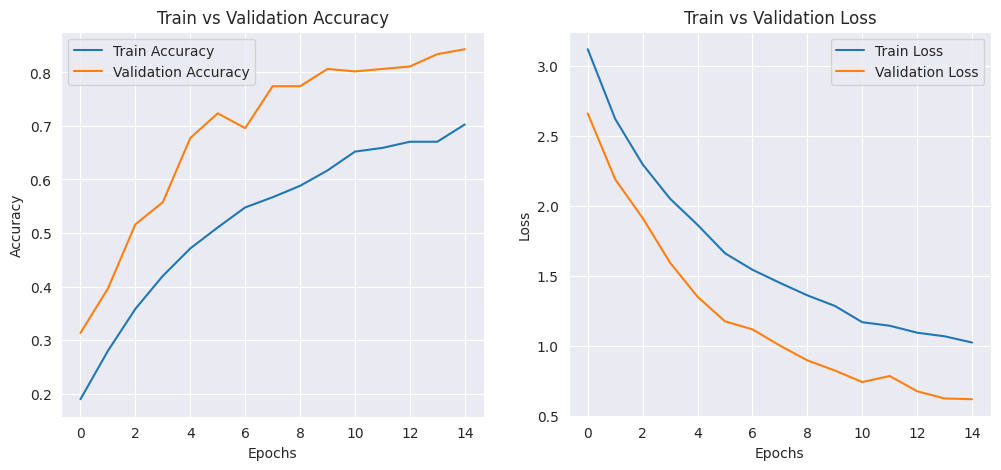

In [ ]:
# 📌 Install library yang diperlukan
!pip install tensorflow keras numpy pandas scikit-learn matplotlib seaborn opencv-python

# 📌 Import library
import os
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D, Input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('darkgrid')

# 📌 Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# 📌 Path ke dataset dalam Google Drive
dataset_path = '/content/drive/My Drive/LASTDANCELASTCHANCE/'

# 📌 Buat dataframe dari dataset
filepaths = []
labels = []

for label in os.listdir(dataset_path):
    class_path = os.path.join(dataset_path, label)
    if os.path.isdir(class_path):
        for file in os.listdir(class_path):
            filepaths.append(os.path.join(class_path, file))
            labels.append(label)

df = pd.DataFrame({'filepaths': filepaths, 'labels': labels})

# 📌 Ambil semua kelas yang unik dan urutkan
all_classes = sorted(df['labels'].unique())

# 📌 Split dataset dengan stratifikasi
train_split = 0.8
test_split = 0.1
dummy_split = test_split / (1 - train_split)

train_df, dummy_df = train_test_split(
    df, train_size=train_split, stratify=df['labels'], shuffle=True, random_state=123)

test_df, valid_df = train_test_split(
    dummy_df, train_size=dummy_split, stratify=dummy_df['labels'], shuffle=True, random_state=123)

print("Jumlah data per kategori di train set:")
print(train_df['labels'].value_counts())

# 📌 Image Data Generator untuk augmentasi
img_size = (224, 224)
batch_size = 32

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

valid_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_gen = train_datagen.flow_from_dataframe(
    train_df, x_col='filepaths', y_col='labels', target_size=img_size,
    batch_size=batch_size, class_mode='categorical', shuffle=True,
    classes=all_classes
)

valid_gen = valid_datagen.flow_from_dataframe(
    valid_df, x_col='filepaths', y_col='labels', target_size=img_size,
    batch_size=batch_size, class_mode='categorical', shuffle=True,
    classes=all_classes
)

test_gen = test_datagen.flow_from_dataframe(
    test_df, x_col='filepaths', y_col='labels', target_size=img_size,
    batch_size=batch_size, class_mode='categorical', shuffle=False,
    classes=all_classes
)

# 📌 Mendapatkan jumlah kelas (konsisten di semua subset)
num_classes = len(all_classes)
print(f"Jumlah kelas: {num_classes}")

# 📌 Load Xception sebagai feature extractor
base_model = tf.keras.applications.Xception(include_top=False, weights="imagenet", input_tensor=Input(shape=(224,224,3)))

# 📌 Freeze layer Xception agar tidak ikut dilatih
base_model.trainable = False

# 📌 Bangun model
print(f"Building model with {base_model}")
x = GlobalAveragePooling2D()(base_model.output)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
output_layer = Dense(num_classes, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=output_layer)

# 📌 Compile model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# 📌 Tampilkan arsitektur model
model.summary()

# 📌 Train model
epochs = 15
history = model.fit(train_gen, epochs=epochs, validation_data=valid_gen)

# 📌 Evaluasi model pada test set
test_loss, test_acc = model.evaluate(test_gen)
print(f"Test Accuracy: {test_acc:.4f}")

# 📌 Simpan model
model.save('/content/drive/My Drive/model_cnn_batik.h5')
print("Model telah disimpan.")

# 📌 Plot hasil training
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Train vs Validation Accuracy")

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Train vs Validation Loss")
plt.show()


In [ ]:
def print_in_color(txt_msg,fore_tupple,back_tupple,):
    #prints the text_msg in the foreground color specified by fore_tupple with the background specified by back_tupple
    #text_msg is the text, fore_tupple is foregroud color tupple (r,g,b), back_tupple is background tupple (r,g,b)
    rf,gf,bf=fore_tupple
    rb,gb,bb=back_tupple
    msg='{0}' + txt_msg
    mat='\33[38;2;' + str(rf) +';' + str(gf) + ';' + str(bf) + ';48;2;' + str(rb) + ';' +str(gb) + ';' + str(bb) +'m'
    print(msg .format(mat), flush=True)
    print('\33[0m', flush=True) # returns default print color to back to black
    return

In [ ]:
def tr_plot(tr_data, start_epoch):
    #Plot the training and validation data
    tacc=tr_data.history['accuracy']
    tloss=tr_data.history['loss']
    vacc=tr_data.history['val_accuracy']
    vloss=tr_data.history['val_loss']
    Epoch_count=len(tacc)+ start_epoch
    Epochs=[]
    for i in range (start_epoch ,Epoch_count):
        Epochs.append(i+1)
    index_loss=np.argmin(vloss)#  this is the epoch with the lowest validation loss
    val_lowest=vloss[index_loss]
    index_acc=np.argmax(vacc)
    acc_highest=vacc[index_acc]
    plt.style.use('fivethirtyeight')
    sc_label='best epoch= '+ str(index_loss+1 +start_epoch)
    vc_label='best epoch= '+ str(index_acc + 1+ start_epoch)
    fig,axes=plt.subplots(nrows=1, ncols=2, figsize=(20,8))
    axes[0].plot(Epochs,tloss, 'r', label='Training loss')
    axes[0].plot(Epochs,vloss,'g',label='Validation loss' )
    axes[0].scatter(index_loss+1 +start_epoch,val_lowest, s=150, c= 'blue', label=sc_label)
    axes[0].set_title('Training and Validation Loss')
    axes[0].set_xlabel('Epochs')
    axes[0].set_ylabel('Loss')
    axes[0].legend()
    axes[1].plot (Epochs,tacc,'r',label= 'Training Accuracy')
    axes[1].plot (Epochs,vacc,'g',label= 'Validation Accuracy')
    axes[1].scatter(index_acc+1 +start_epoch,acc_highest, s=150, c= 'blue', label=vc_label)
    axes[1].set_title('Training and Validation Accuracy')
    axes[1].set_xlabel('Epochs')
    axes[1].set_ylabel('Accuracy')
    axes[1].legend()
    plt.tight_layout
    #plt.style.use('fivethirtyeight')
    plt.show()


In [ ]:
def print_info( test_gen, preds, print_code, save_dir, subject ):
    class_dict=test_gen.class_indices
    labels= test_gen.labels
    file_names= test_gen.filenames
    error_list=[]
    true_class=[]
    pred_class=[]
    prob_list=[]
    new_dict={}
    error_indices=[]
    y_pred=[]
    for key,value in class_dict.items():
        new_dict[value]=key             # dictionary {integer of class number: string of class name}
    # store new_dict as a text fine in the save_dir
    classes=list(new_dict.values())     # list of string of class names
    dict_as_text=str(new_dict)
    dict_name= subject + '-' +str(len(classes)) +'.txt'
    dict_path=os.path.join(save_dir,dict_name)
    with open(dict_path, 'w') as x_file:
        x_file.write(dict_as_text)
    errors=0
    for i, p in enumerate(preds):
        pred_index=np.argmax(p)
        true_index=labels[i]  # labels are integer values
        if pred_index != true_index: # a misclassification has occurred
            error_list.append(file_names[i])
            true_class.append(new_dict[true_index])
            pred_class.append(new_dict[pred_index])
            prob_list.append(p[pred_index])
            error_indices.append(true_index)
            errors=errors + 1
        y_pred.append(pred_index)
    if print_code !=0:
        if errors>0:
            if print_code>errors:
                r=errors
            else:
                r=print_code
            msg='{0:^28s}{1:^28s}{2:^28s}{3:^16s}'.format('Filename', 'Predicted Class' , 'True Class', 'Probability')
            print_in_color(msg, (0,255,0),(55,65,80))
            for i in range(r):
                split1=os.path.split(error_list[i])
                split2=os.path.split(split1[0])
                fname=split2[1] + '/' + split1[1]
                msg='{0:^28s}{1:^28s}{2:^28s}{3:4s}{4:^6.4f}'.format(fname, pred_class[i],true_class[i], ' ', prob_list[i])
                print_in_color(msg, (255,255,255), (55,65,60))
                #print(error_list[i]  , pred_class[i], true_class[i], prob_list[i])
        else:
            msg='With accuracy of 100 % there are no errors to print'
            print_in_color(msg, (0,255,0),(55,65,80))
    if errors>0:
        plot_bar=[]
        plot_class=[]
        for  key, value in new_dict.items():
            count=error_indices.count(key)
            if count!=0:
                plot_bar.append(count) # list containg how many times a class c had an error
                plot_class.append(value)   # stores the class
        fig=plt.figure()
        fig.set_figheight(len(plot_class)/3)
        fig.set_figwidth(10)
        plt.style.use('fivethirtyeight')
        for i in range(0, len(plot_class)):
            c=plot_class[i]
            x=plot_bar[i]
            plt.barh(c, x, )
            plt.title( ' Errors by Class on Test Set')
    y_true= np.array(labels)
    y_pred=np.array(y_pred)
    if len(classes)<= 30:
        # create a confusion matrix
        cm = confusion_matrix(y_true, y_pred )
        length=len(classes)
        if length<8:
            fig_width=8
            fig_height=8
        else:
            fig_width= int(length * .5)
            fig_height= int(length * .5)
        plt.figure(figsize=(fig_width, fig_height))
        sns.heatmap(cm, annot=True, vmin=0, fmt='g', cmap='Blues', cbar=False)
        plt.xticks(np.arange(length)+.5, classes, rotation= 90)
        plt.yticks(np.arange(length)+.5, classes, rotation=0)
        plt.xlabel("Predicted")
        plt.ylabel("Actual")
        plt.title("Confusion Matrix")
        plt.show()
    clr = classification_report(y_true, y_pred, target_names=classes)
    print("Classification Report:\n----------------------\n", clr)

In [ ]:
save_dir = './'
subject = 'Batik Exception'

# Tambahkan jika belum ada
test_steps = test_gen.samples // test_gen.batch_size

# Gunakan batch_size yang sudah didefinisikan sebelumnya
acc = model.evaluate(test_gen, batch_size=batch_size, verbose=1, steps=test_steps, return_dict=False)[1] * 100

msg = f'Accuracy on the test set is {acc:5.2f} %'
print_in_color(msg, (0, 255, 0), (55, 65, 80))

# Simpan model dengan nama sesuai akurasi
model_name = 'Xception-Batik-Kuansing'
save_id = f"{model_name}-{subject}-{str(acc)[:str(acc).rfind('.')+3]}.h5"
save_loc = os.path.join(save_dir, save_id)
model.save(save_loc)


6/6 ━━━━━━━━━━━━━━━━━━━━ 57s 9s/step - accuracy: 0.8484 - loss: 0.5099
Accuracy on the test set is 83.85 %



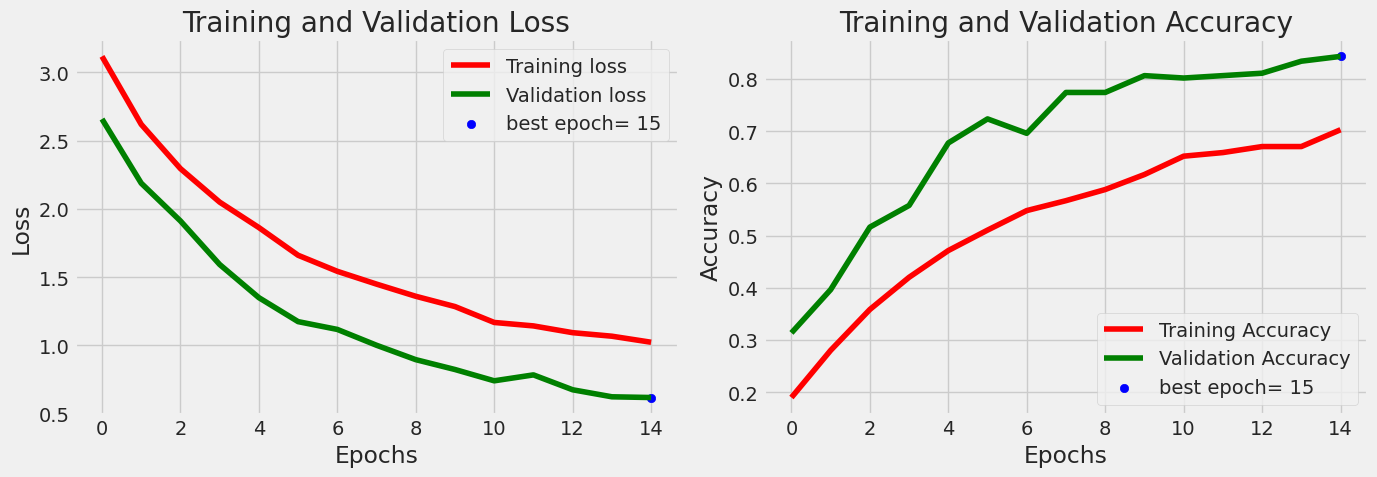

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Menentukan epoch dengan akurasi validasi terbaik
best_epoch = np.argmax(history.history['val_accuracy']) + 1
best_val_acc = history.history['val_accuracy'][best_epoch - 1]
best_val_loss = history.history['val_loss'][best_epoch - 1]

# Plot Loss
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], 'r-', label='Training loss')
plt.plot(history.history['val_loss'], 'g-', label='Validation loss')
plt.scatter(best_epoch - 1, best_val_loss, color='blue', label=f'best epoch= {best_epoch}')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot Accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], 'r-', label='Training Accuracy')
plt.plot(history.history['val_accuracy'], 'g-', label='Validation Accuracy')
plt.scatter(best_epoch - 1, best_val_acc, color='blue', label=f'best epoch= {best_epoch}')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


7/7 ━━━━━━━━━━━━━━━━━━━━ 46s 7s/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Classification Report:
----------------------
                                                       precision    recall  f1-score   support

ABSTRAK HALUAN JALUR + PENDAYUNG + TAKULUAK BAREMBAI       1.00      1.00      1.00         2
                 ABSTRAK TAKULUAK BAREMBAI+PENDAYUNG       1.00      1.00      1.00         7
                       BAMBU+TAKULUAK BAREMBAI TABUR       1.00      0.50      0.67         2
                                BUJANG DARA KUANSING       1.00      1.00      1.00         4
                         BUNGA JALUR + DAUN SEDINGIN       1.00      1.00      1.00         2
                               BUNGA PAKIS+PENDAYUNG       1.00      1.00      1.00         3
                                  CAGAK JALUR BAPACU       1.00      0.40      0.57         5
                                           CALEMPONG       1.00      0.50      0.67         6
                                    CALEMPONG+DAYUNG       1.00      0.67      0.80         3
            

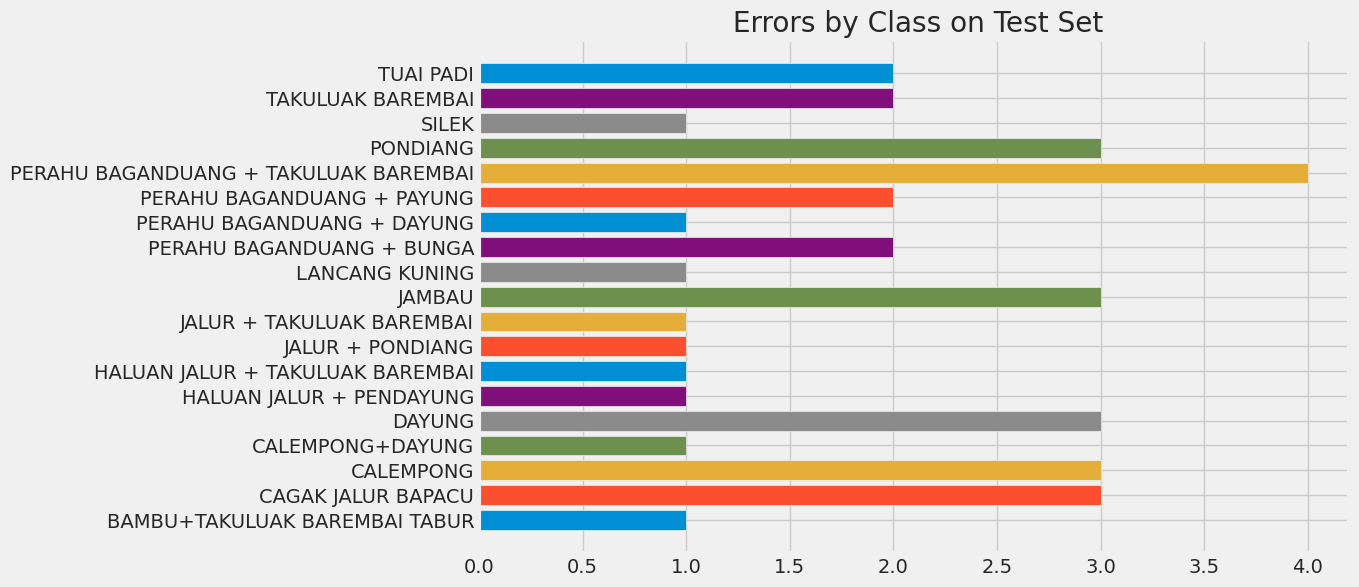

In [ ]:
from sklearn.metrics import classification_report
print_code=0
preds=model.predict(test_gen)
print_info( test_gen, preds, print_code, save_dir, subject )


7/7 ━━━━━━━━━━━━━━━━━━━━ 45s 7s/step


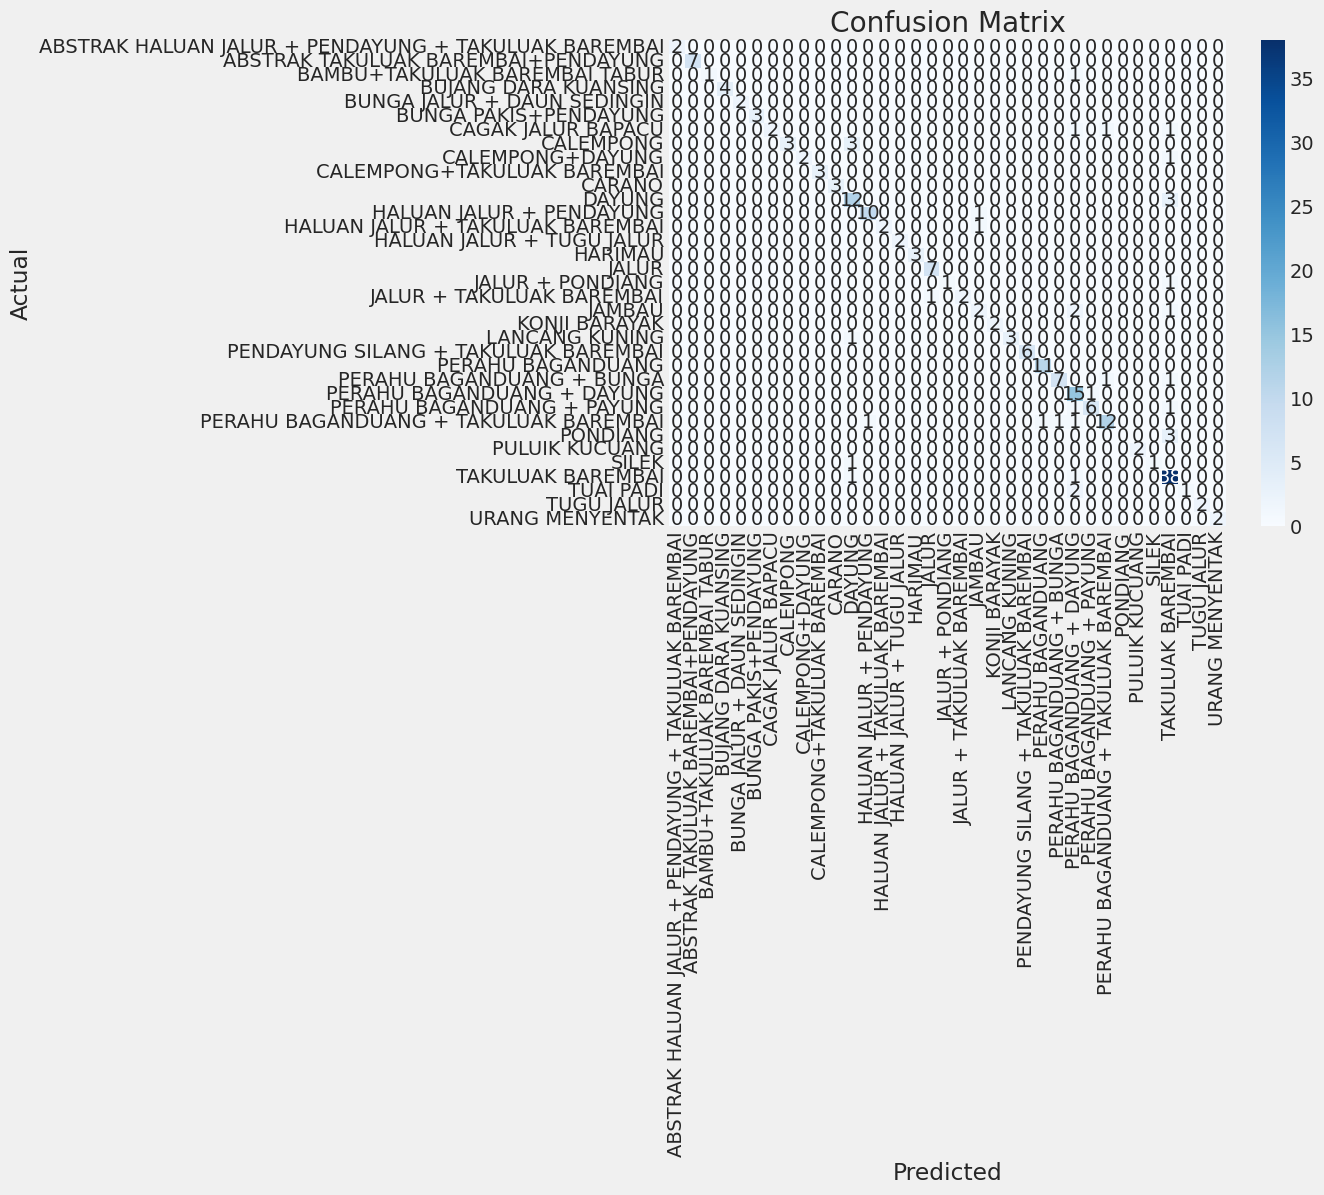

Classification Report:
                                                       precision    recall  f1-score   support

ABSTRAK HALUAN JALUR + PENDAYUNG + TAKULUAK BAREMBAI       1.00      1.00      1.00         2
                 ABSTRAK TAKULUAK BAREMBAI+PENDAYUNG       1.00      1.00      1.00         7
                       BAMBU+TAKULUAK BAREMBAI TABUR       1.00      0.50      0.67         2
                                BUJANG DARA KUANSING       1.00      1.00      1.00         4
                         BUNGA JALUR + DAUN SEDINGIN       1.00      1.00      1.00         2
                               BUNGA PAKIS+PENDAYUNG       1.00      1.00      1.00         3
                                  CAGAK JALUR BAPACU       1.00      0.40      0.57         5
                                           CALEMPONG       1.00      0.50      0.67         6
                                    CALEMPONG+DAYUNG       1.00      0.67      0.80         3
                         CALEMPONG+

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix

# 🔸 Prediksi label dari generator
preds = model.predict(test_gen)
y_pred = np.argmax(preds, axis=1)

# 🔸 Label asli
y_true = test_gen.classes

# 🔸 Daftar nama kelas
class_names = list(test_gen.class_indices.keys())

# 🔸 Confusion matrix
cm = confusion_matrix(y_true, y_pred)

# 🔸 Plot confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# 🔸 Classification report
clr = classification_report(y_true, y_pred, target_names=class_names)
print("Classification Report:\n", clr)
